In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
sns.set_theme(style="ticks", font_scale=1.5)
sns.set_style('ticks')

In [46]:
df = pd.read_csv('./breakhis_onnx_1_100.csv')
# df = pd.read_csv('./breakhis_onnx_10_100.csv')
# df = pd.read_csv('./breakhis_pytorch_1_100.csv')
# df = pd.read_csv('./breakhis_pytorch_10_100.csv')
df.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,1693134303,1.000,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
1,http_req_duration,1693134303,239.987,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
2,http_req_blocked,1693134303,0.918,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
3,http_req_connecting,1693134303,0.586,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
4,http_req_tls_handshaking,1693134303,0.000,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN


In [47]:
metric_name = "http_req_duration"
metric_df = df.loc[df['metric_name'] == metric_name]
metric_df = metric_df.sort_values(by=['timestamp'])
metric_df = metric_df.reset_index(drop=True)
metric_df.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_req_duration,1693134303,239.987,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
1,http_req_duration,1693134304,204.783,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
2,http_req_duration,1693134305,200.733,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
3,http_req_duration,1693134306,200.854,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN
4,http_req_duration,1693134308,212.612,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/ed197849ec134041...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/ed197849ec134041...,NaN,NaN


<Axes: ylabel='metric_value'>

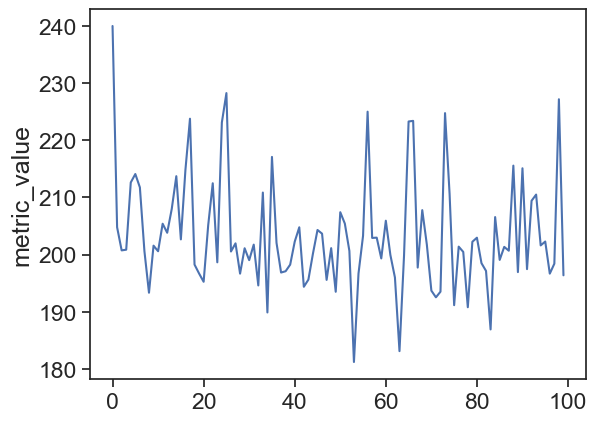

In [48]:
sns.lineplot(data=metric_df, x=metric_df.index, y="metric_value")

In [49]:
def get_filtered_dataset(path: str, metric_name: str, model_type: str):
    df = pd.read_csv(path)
    metric_df = df.loc[df["metric_name"] == metric_name]
    metric_df = metric_df.sort_values(by=['timestamp'])
    metric_df = metric_df.reset_index(drop=True)
    metric_df["format"] = model_type
    return metric_df

In [50]:
metric_name = "http_req_waiting"
dataset = "onnx"
user = "10"
iterations = "1000"

df_breakhis_onnx = get_filtered_dataset(f'./{dataset}_onnx_{user}_{iterations}.csv', metric_name, 'onnx')
df_breakhis_pytorch = get_filtered_dataset(f'./{dataset}_pytorch_{user}_{iterations}.csv', metric_name, 'pytorch')

In [51]:
df_breakhis_onnx

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata,format
0,http_req_waiting,1693242499,16.105,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
1,http_req_waiting,1693242499,16.193,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
2,http_req_waiting,1693242499,16.102,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
3,http_req_waiting,1693242499,16.087,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
4,http_req_waiting,1693242499,16.272,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,http_req_waiting,1693242599,12.944,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
996,http_req_waiting,1693242599,12.927,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
997,http_req_waiting,1693242599,13.862,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx
998,http_req_waiting,1693242599,13.609,NaN,NaN,NaN,True,NaN,POST,http://10.168.2.83:8080/serve/4764941541f54582...,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://10.168.2.83:8080/serve/4764941541f54582...,NaN,NaN,onnx


In [52]:
combined = pd.concat([df_breakhis_onnx, df_breakhis_pytorch], ignore_index=False)

In [53]:
print(df_breakhis_pytorch["metric_value"].mean())
print(df_breakhis_onnx["metric_value"].mean())

7.678405999999999
8.666046


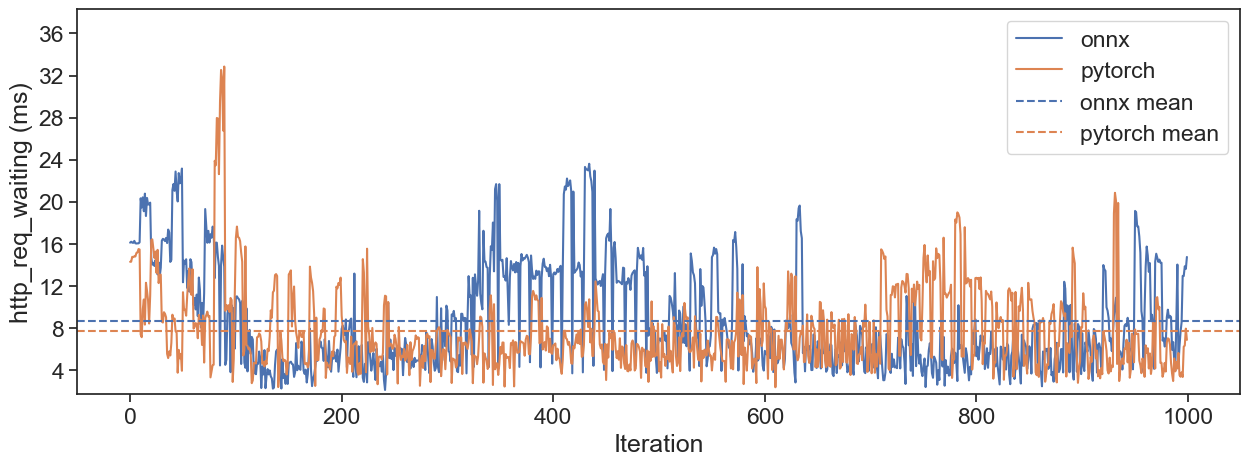

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(combined, x=combined.index, y="metric_value", hue="format")
for format_name, group in combined.groupby('format'):
    mean_value = group['metric_value'].mean()
    ax.axhline(mean_value, color=sns.color_palette()[list(combined['format'].unique()).index(format_name)], linestyle='--', label=f'{format_name} mean')
ax.legend(loc='upper right')
plt.ylim(combined["metric_value"].min() - combined["metric_value"].mean() / 20, combined["metric_value"].max() + combined["metric_value"].mean() /1.5)
ax.set(xlabel="Iteration", ylabel=metric_name + " (ms)")
ax.yaxis.set_major_locator(MaxNLocator(nbins=12))
plt.savefig(f"{dataset}_{user}_{iterations}.pdf", format="pdf", dpi=300, bbox_inches='tight', transparent=True)

In [55]:
#  breakhis
onnx = [6.274925112847995e-7,0.9990925788879395,0.00018950639059767127,0.000010166270840272773,0.0007039982592687011,3.441242313328985e-7,0.0000016426957927251351,0.0000011828622064058436]
pytorch = [6.274889301494113e-7,0.9990925788879395,0.0001895044115372002,0.000010166290849156212,0.0007039969204925001,3.4412093441460456e-7,0.0000016426787396994769,0.000001182855498882418]

for first, second in zip(onnx, pytorch):
    print(first-second)

3.581135388230905e-12
0.0
1.979060471057892e-09
-2.000888343900442e-11
1.3387762010097504e-09
3.296918293926865e-12
1.7053025658242404e-11
6.707523425575346e-12


In [56]:
# MNIST
onnx = [3.0254659454803656e-12,1.2336614048622248e-18,2.3716170357863248e-14,3.809966244716634e-7,1.9421874675060397e-15,0.9999889135360718,4.0716097160498066e-10,4.7485293827457045e-15,0.000010717795703385491,3.8621079667677805e-9]
pytorch = [3.0254659454803656e-12,1.2336660577531704e-18,2.371612631214999e-14,3.80996993953886e-7,1.942194879044328e-15,0.9999889135360718,4.071601944488634e-10,4.7485475939540705e-15,0.00001071778478944907,3.8621226217117055e-9]

for first, second in zip(onnx, pytorch):
    print(first-second)

0.0
-4.652890945610781e-24
4.404571325722362e-20
-3.694822225952521e-13
-7.411538288475128e-21
0.0
7.771561172376096e-16
-1.8211208365967457e-20
1.0913936421275139e-11
-1.4654943925052066e-14


In [57]:
mnist_onnx = [
    [3.873064629428269e-12,0.000056282166042365134,0.00012318491644691676,0.00003668491990538314,3.375042822995056e-8,4.1624641511361915e-9,2.087192520054161e-14,0.9997830986976624,7.298847322090296e-7,3.2141722616785273e-9],
    [4.052498693064323e-15,9.731982997251976e-10,2.630904934013134e-13,4.551412957458367e-15,0.9999996423721313,3.971610540443038e-10,4.58065117954487e-14,2.7942464342345374e-8,9.432214037596864e-11,3.1666994004808657e-7],
    [4.377843465769548e-18,6.060479375291639e-12,1.421449513649975e-9,0.9999990463256836,1.6005417680770538e-14,2.4847883750567235e-8,1.9987061644280565e-15,2.8073220831315027e-12,9.607526862964733e-7,8.884732359548675e-12],
    [1.3155472800008283e-7,1.611360919912333e-13,0.00002389832843618933,0.003325416473671794,3.6018041882357466e-9,1.27859621557036e-7,3.740686338460364e-7,1.4658226021868614e-11,0.9966493248939514,7.436328246512858e-7],
    [3.69602569036398e-12,1.3243375146521075e-11,1.373134761450956e-8,0.00005264705396257341,7.50411857097788e-8,0.5676306486129761,0.00004105466359760612,1.470355504018528e-10,0.4322752356529236,3.548900906480412e-7]
]

mnist_pytorch = [
    [3.873072002003042e-12,0.00005628200597129762,0.00012318433437030762,0.00003668491990538314,3.375036428110434e-8,4.1624641511361915e-9,2.0871886237026037e-14,0.9997830986976624,7.29883367966977e-7,3.2141662664741943e-9],
    [4.052513939657373e-15,9.732019634611788e-10,2.6309098129229103e-13,4.551430321633786e-15,0.9999996423721313,3.971618034448454e-10,4.580668797830173e-14,2.794257092375574e-8,9.432232078721015e-11,3.166702526868903e-7],
    [4.3778600093817994e-18,6.0604910846751014e-12,1.421449513649975e-9,0.9999990463256836,1.600544817395664e-14,2.4847977897479723e-8,1.9987137877245818e-15,2.8073220831315027e-12,9.607554147805786e-7,8.884766186656456e-12],
    [1.315553532776903e-7,1.6113670185495532e-13,0.000023898397557786666,0.003325433935970068,3.6018110716184992e-9,1.2786010472609632e-7,3.740704244137305e-7,1.4658281533019846e-11,0.9966493248939514,7.436349278577836e-7],
    [3.696035665023967e-12,1.324343759656621e-11,1.3731359160829015e-8,0.000052647097618319094,7.504146282144575e-8,0.5676311254501343,0.000041054659959627315,1.4703624429124318e-10,0.4322747588157654,3.548917391071882e-7]
]

breakhis_onnx = [
    [1,1.6489599019564594e-8,5.516183065878977e-10,1.6396630719839322e-9,8.802553130848878e-10,1.4644442787766367e-18,4.220760893569597e-12,3.4021564295078848e-18],
    [9.053621141674739e-8,0.000002416884854028467,0.9998779296875,1.3557216504977987e-7,0.0000020834331735386513,8.961854369715638e-9,0.00011729029938578606,3.246742252827062e-8],
    [0.000004233596882841084,0.00417939480394125,0.9950160384178162,0.00003731171091203578,0.0007442896021530032,0.000017376974938088097,3.4983678176558897e-9,0.000001347228590020677],
    [2.7763948917680636e-9,8.120859718019346e-8,0.0000019067995253863046,4.636738282215447e-8,1.8839152460259356e-7,9.687118295020891e-12,0.9999977350234985,6.649533701441612e-10],
    [3.571567788185348e-7,0.9997195601463318,0.0000654249161016196,0.00003758570528589189,0.00004381455801194534,0.0000025438880584260914,0.000002308581770193996,0.0001284087629755959]
]

breakhis_pytorch = [
    [1,1.6489661192053973e-8,5.516204160116445e-10,1.6396662916307037e-9,8.80257033930576e-10,1.4644442787766367e-18,4.22077693976175e-12,3.4021694576025325e-18],
    [9.053603378106345e-8,0.0000024168825802917127,0.9998779296875,1.3557203715208743e-7,0.0000020834372662648093,8.961836606147244e-9,0.0001172892953036353,3.246742252827062e-8],
    [0.0000042336050682934,0.004179415293037891,0.9950160384178162,0.00003731171091203578,0.0007442925125360489,0.000017376876712660305,3.4983678176558897e-9,0.000001347229840575892],
    [2.776379126601114e-9,8.120828454138973e-8,0.0000019067813354922691,4.63669422856583e-8,1.883907998490031e-7,9.687044569273162e-12,0.9999977350234985,6.649458206275938e-10],
    [3.5715711987904797e-7,0.9997195601463318,0.00006542466871906072,0.000037585563404718414,0.00004381451435619965,0.000002543873506510863,0.000002308579723830917,0.0001284091267734766]
]

In [58]:
diff_mnist = []
for index, (onnx, pytorch) in enumerate(zip(mnist_onnx, mnist_pytorch)):
    diff_mnist.append([])
    for index_value, (onnx_val, pytorch_val) in enumerate(zip(onnx, pytorch)):
        diff_mnist[index].append(pytorch_val - onnx_val)

In [59]:
diff_mnist = np.array(diff_mnist)
mnist_max = diff_mnist.max(axis=1)
mnist_min = diff_mnist.min(axis=1)
mnist_mean = diff_mnist.mean(axis=1)
mnist_mean

array([-7.43581855e-11,  4.23814459e-14,  2.82267659e-13,  1.75364290e-09,
        4.19556503e-12])

In [60]:
df = pd.DataFrame(dict(min=mnist_min, max=mnist_max,  mean=mnist_mean))
df

,min,max,mean
0,-5.820766e-10,7.372575e-18,-7.435819e-11
1,0.000000e+00,3.126388e-13,4.238145e-14
2,0.000000e+00,2.728484e-12,2.822677e-13
3,0.000000e+00,1.746230e-08,1.753643e-09
4,-4.768372e-07,4.768372e-07,4.195565e-12


In [61]:
diff_breakhis = []
for index, (onnx, pytorch) in enumerate(zip(breakhis_onnx, breakhis_pytorch)):
    diff_breakhis.append([])
    for index_value, (onnx_val, pytorch_val) in enumerate(zip(onnx, pytorch)):
        diff_breakhis[index].append(pytorch_val - onnx_val)

In [62]:
diff_breakhis = np.array(diff_breakhis)
breakhis_max = diff_breakhis.max(axis=1)
breakhis_min = diff_breakhis.min(axis=1)
breakhis_mean = diff_breakhis.mean(axis=1)
breakhis_min

array([ 0.00000000e+00, -1.00408215e-09, -9.82254278e-11, -1.81898940e-11,
       -2.47382559e-10])

In [63]:
df = pd.DataFrame(dict(min=breakhis_min, max=breakhis_max,  mean=breakhis_mean))
df

,min,max,mean
0,0.000000e+00,6.217249e-14,8.654806e-15
1,-1.004082e-09,4.092726e-12,-1.253233e-10
2,-9.822543e-11,2.048910e-08,2.913836e-09
3,-1.818989e-11,0.000000e+00,-2.461401e-12
4,-2.473826e-10,3.637979e-10,-1.067235e-11
